# 주성분 분석

차원을 축소해서 저장공간을 확보하고 성능을 높이자.   
- <u>**차원 축소(dimensionality reduction)**: 데이터를 가장 잘 나타내는 일부 특성만 남기는 과정.</u>   
데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있다.   
(특성이 많으면 선형 모델의 성능이 높아지지만 훈련 데이터에 쉽게 과대적합된다.)   
또한, 줄어든 차원에서 다시 원본 차원(예, 10000개 특성 = 차원)으로 손실을 최대한 줄이면서 복원할 수도 있다.   
</br>

- <u>**주성분 분석(principal component analysis; PCA): 대표적 차원 축소 알고리즘**</u>   
모든 데이터와의 분산이 큰 '방향'(=주성분)을 찾는다.   
(방향이라는 표현이 어색한데, 1차원의 선? 이나 위치값?으로 이해해도 괜찮을지....)   
분산이 가장 크다는 것은 모든 데이터를 가장 잘 나타낸다는 것.   
이 방향이 갖는 값이 벡터. 아래 예시에서는 (2, 1)로 표현되었으며, 특성의 개수가 2개이므로 2개의 원소를 가진다.   
</br>         

- <u>**주성분 벡터의 원소 개수는 원본 데이터셋의 특성 개수만큼 만들어진다.**</u>   
원본 데이터셋의 특성 개수가 3이면 (3, 2, 1) 과같이 3개의 원소를 가지고,   
10000개면 (10, 16, 11, ..., 7)의 총 10000개의 요소를 가진 주성분 벡터가 만들어진다.    
(위의 숫자는 임의의 예시일 뿐이라는 점에 주의!!!!!!)   
(근데 벡터가 무슨 말인지는 모르겠음...)   
</br>

- <u>**주성분 개수**</u>   
이 주성분 벡터의 리스트를 요청한 개수(PCA(n_components=50))만큼 만들수 있다.   
(예를 들면, n_components=50이면 10000개의 요소를 가진 주성분이 50개 만들어짐)</br>   
그 중 첫번째 주성분(10000개 요소를 가지고 있음)이 가장 분산이 큰 '방향'.   
그 다음, 첫번째 주성분에 '수직'이고 분산이 가장 큰 '방향'이 두번째 주성분.</br>   
특성 개수에 따라 '최대' 주성분의 수가 정해진다. 10000개 특성이 있으면 10000개까지 만들 수 있음.   
나중에 '설명된 분산'이라는 말로 첫번째 주성분, 두번째 주성분, ..., 50번째 주성분에 대해 각각 분산 값을 확인하고, 그걸 다 더할거임....   
이제 밑에 내려서 읽고 다시 올라오세요...   

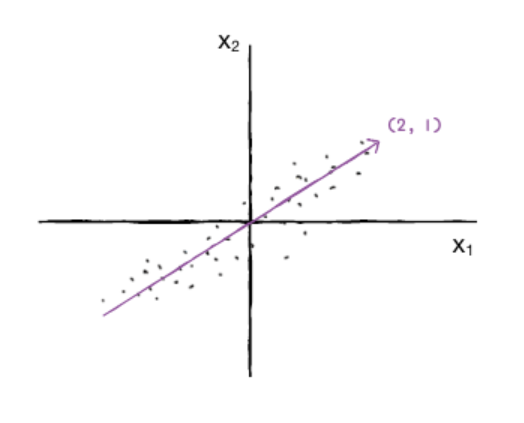

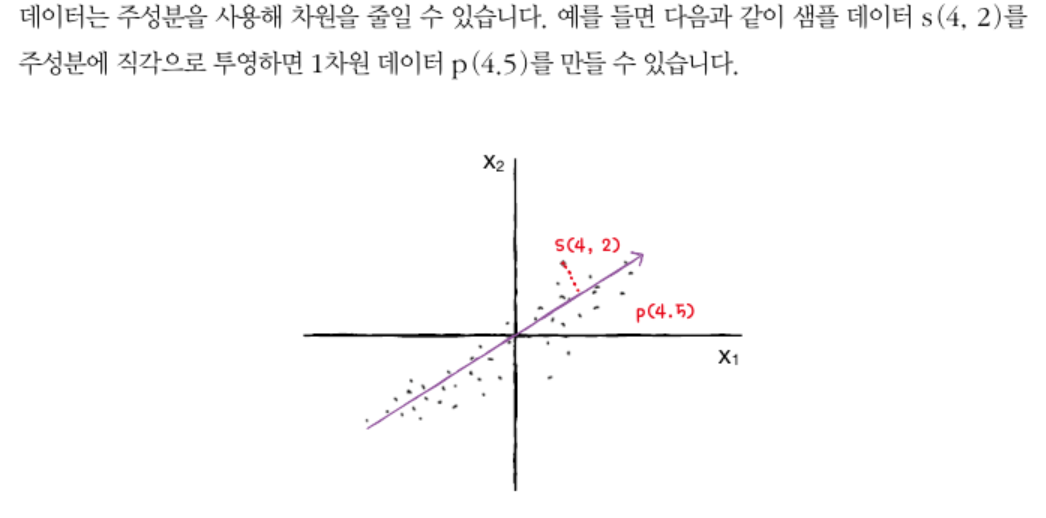

위 그림은 2차원 샘플 데이터를, 1개의 값을 가지는 1차원 데이터로 투영

## PCA 클래스

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)     # 사이킷런 훈련을 위해 데이터를 2차원 배열로 축소 (전처리)

--2023-03-10 08:47:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-10 08:47:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-10 08:47:18--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)      # 주성분 50개로 설정하여 50개까지만 찾아내도록 하는 함수를 선언 (원래는 10000개까지 할 수 있음)
pca.fit(fruits_2d)              # fruits_2d 데이터를 pca 실행, 비지도학습이므로 fit() 메서드에 타깃값을 제공하지 않고 훈련 데이터만 제공.

PCA(n_components=50)

In [13]:
# PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있음
print(pca.components_.shape)    # 10000개의 원소를 가지고 있는 50개의 주성분 리스트 = pca.components_
# 이는 10000개의 차원에 상대적 위치값을 나타내...냐? 암튼 이 한뭉텅이가 주성분 1개를 뜻하고, 첫번째 주성분이 가장 분산이 큰 것.
print(pca.components_[0][5000:5010])

(50, 10000)
[ 0.00027027  0.00150121  0.00082657  0.00032906 -0.00087208 -0.00240202
 -0.00358491 -0.0044984  -0.00507517 -0.00542826]


In [58]:
# 그림그리는 함수
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수. 각 라벨마다 갯수가 다르기 때문에 확인절차를 거친다.
    # ▼ 한 줄에 10개씩 이미지를 그린다. 샘플 개수를 10으로 나누고 올림(ceil)을 해서 화면에 나타낼 전체 행 개수를 계산. 
    rows = int(np.ceil(n/10))  
    # ▼ 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    # ▼ 전체 틀 만들기
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # 샘플 개수만큼만 그리면 됩니다. 개수 끝나면 그리기 끝!
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')  # 빈 axs까지도 axis off해주기 위해서 if문 밖으로 빼놓음
    plt.show()

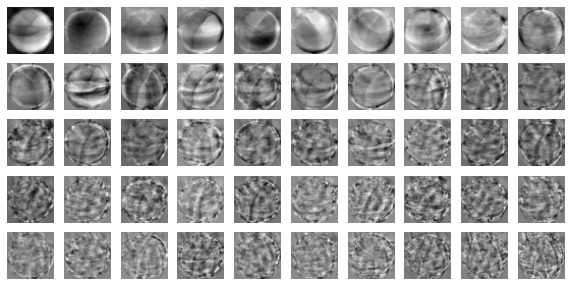

In [ ]:
# 50개의 '주성분'을 그림으로 그려보자 (아직 투영 전!)
draw_fruits(pca.components_.reshape(-1, 100, 100))

### 주성분 투영하기

In [ ]:
# 원본 데이터의 크기: 이미지 총 300개, 총 10000개의 특성을 가지고 있다.
print(fruits_2d.shape)

(300, 10000)


In [16]:
# fruits_2d 데이터로 훈련시켜놓은 주성분 PCA 모델에 fruits_2d 데이터를 투영시킴: tranform() 메서드 사용
fruits_pca = pca.transform(fruits_2d)

In [17]:
# 투영한 데이터의 크기를 살펴보자.
# 주성분 분석으로 투영해서 이미지 총 300개(이미지는 그대로 가져가는게 맞으니까!),
# 10000개의 특성을 50개로 줄였음! ==> 데이터를 줄여서 저장되는 공간을 줄임
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성
(재구성 과정은 필수적인 것은 아니고, 재구성이 가능하다는 걸 보여주기 위해서 함)   
inverse_transfrom() 메서드를 사용하면 할 수 있다.   
근데 질문) 50개 차원으로 줄였는데, 이전에 10000개의 차원을 가지고 있었다는 데이터가 어딘가에 저장되어 있는건가?

In [23]:
pca.n_features_in_  # 음 여기있네....

10000

In [29]:
print(fruits_pca.shape)

(300, 50)


In [32]:
# 원본 데이터로 복원
fruits_inverse = pca.inverse_transform(fruits_pca)      # inverse_transform() 메서드에 들어가야할 인자는 이차원 array
                                                        # 즉, shape 찍었을 때 (샘플 수, 특성 수)의 크기를 가지는 것
print(fruits_inverse.shape)

(300, 10000)


In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)   # 복원한 데이터를 3차원으로 reshape
print(fruits_reconstruct.shape)

(300, 100, 100)


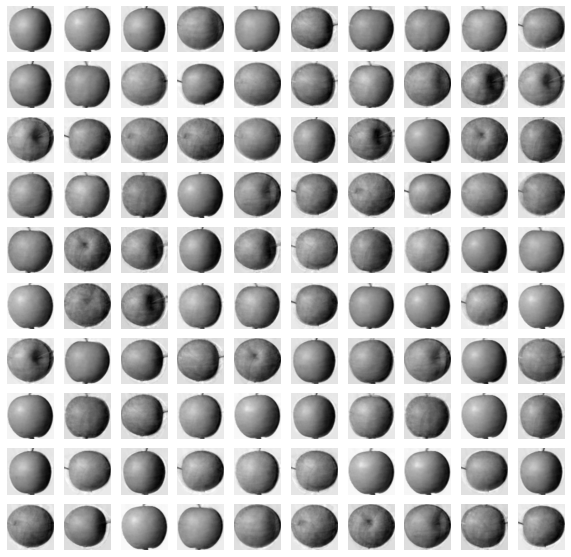

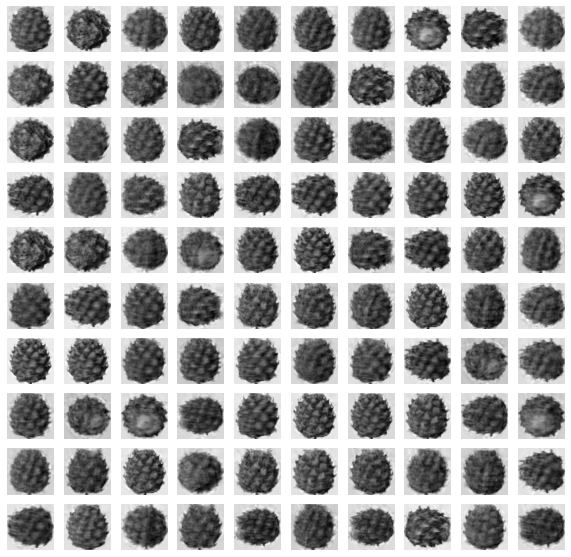

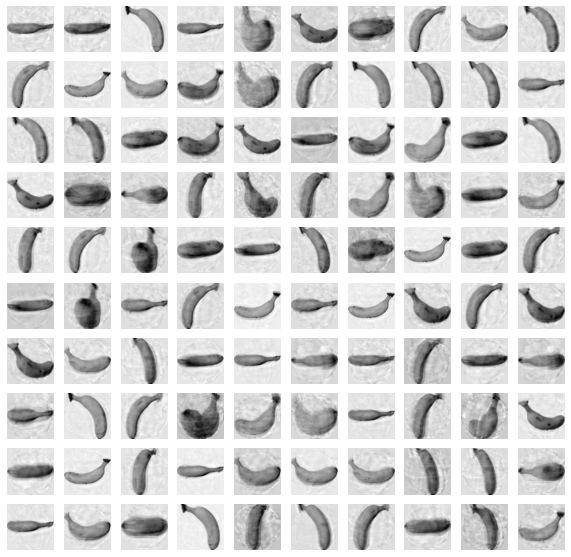

In [ ]:
for start in [0, 100, 200]:                                 # 100개씩 출력
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

## 설명된 분산
(다시 주성분 분석 과정으로 돌아와서)

50개의 특성이 분산을 얼마나 잘 보존하고 있는지 알아보자.

**설명된 분산(explained variance)**: 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값    
PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 저장됨.

첫번째 주성분 분산 값이 가장 크고, 이후 점점 작아진다.   

이 분산의 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산의 비율을 얻을 수 있다.

In [37]:
print(pca.explained_variance_ratio_)                # 50개의 '설명된 분산' 리스트
print('총 분산 비율', np.sum(pca.explained_variance_ratio_))        # 리스트의 값을 전부 더한 값 = 총 분산 비율
# 92% 정도로 분산이 잘 유지했다? 낮을수록 주성분을 덜 긁어왔다는 뜻인가 봄...

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578895 0.005112
 0.00486383 0.00480342 0.00447838 0.00437314 0.00408037 0.00389469
 0.00372434 0.00359278 0.00331456 0.00317796 0.00304306 0.00303716
 0.00288804 0.00275895 0.00264809 0.00255703 0.00252122 0.00247236
 0.00239554 0.0023093  0.00221647 0.00216549 0.00213403 0.00194402
 0.00192336 0.00191126 0.00185035 0.00181591 0.00172123 0.00169192
 0.00162273 0.00161884]
총 분산 비율 0.9215427278026469


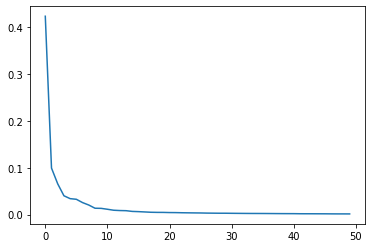

In [ ]:
plt.plot(pca.explained_variance_ratio_)

그래프를 그렸을 때, 처음 10개의 주성분이 대부분의 분산을 표현하고 있는 것을 볼 수 있다.    
10개 이후부터 각 주성분이 설명하고 있는 분산은 비교적 작다.   

In [36]:
print(np.sum(pca.explained_variance_ratio_[:10]))               # 그래서 10개까지만 잘라서 합해봤는데 76%
print(np.sum(pca.explained_variance_ratio_[:20]))               # 84%

0.769492894019155
0.8416601795384949


## 다른 알고리즘과 함께 사용하기


원본 데이터 사용한 훈련 결과 vs 차원 축소 데이터 사용한 훈련 결과   
비교해보자.   

### 1. **로지스틱 회귀 모델에 주성분 분석 데이터를 활용하기.**
차원 축소된 데이터를 사용하여(fruits_pca) 지도학습(타깃값 있어야됨) 모델 훈련.    

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [39]:
# 주의: 우리는 답을 알고 있으므로 타깃 세트를 만들 수 있는 것. 실제 비지도학습에서는 이렇게 안쓴다...
# 지도학습 모델을 사용해보기 위해서 임의로 해보는 것.
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [46]:
# (앞선 챕터에서 했던) 원본 데이터 훈련 결과

from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))            # 교차검증의 점수가 매우 높다. 하지만 특성이 10000개로 매우 많아서, 과대적합된 모델을 만들기 쉬움
print(np.mean(scores['fit_time']))              # 훈련시간을 PCA 축소 데이터 훈련 결과와 비교해보자.

0.9966666666666667
1.878976535797119


In [ ]:
# 주성분 분석으로 차원 축소를 반영한 데이터 훈련 결과

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))            # 교차검증의 점수가 1.0. 특성이 50개로 작아서 과대적합의 우려도 적고,
print(np.mean(scores['fit_time']))              # 훈련 시간도 훨씬 짧게 걸린다.

1.0
0.016320037841796874


주성분 분석이 반영된 데이터로 학습한 알고리즘이 정확도가 더 높고 훈련시간은 훨씬 짧다.

In [41]:
# n_components 매개변수에 주성분의 개수를 지정할 수도 있고,
# *설명된 분산의 비율(합)(0~1 사이의 실수)을 입력할 수도 있다*: 지정된 비율에 도달할 때까지만 자동으로 주성분을 찾는다.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [42]:
print(pca.n_components_)    # 주성분 개수 = 2 , 즉 2개의 특성만으로도 원본 데이터에 있는 분산의 50%를 표현할 수 있다.

2


In [43]:
print(np.sum(pca.explained_variance_ratio_[:2]))        # 주성분 개수 2개까지만 분산을 더했을 때 0.5를 넘는 것을 확인할 수 있다.

0.5229877245800599


In [44]:
# 이 주성분 모델을 가지고 fruits_2d 데이터를 변환 (차원 축소)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [54]:
# 교차검증 재실시
scores = cross_validate(lr, fruits_pca, target) 
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
print('\n')
print('\n')

# 교차 검증의 결과가 충분히 좋다.

0.9933333333333334
0.035103654861450194






/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

### 2. **k-평균 알고리즘에 주성분 분석 데이터를 활용하기.**

In [55]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42, n_init='auto')
km.fit(fruits_pca)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [56]:
print(np.unique(km.labels_, return_counts=True))
# (array([0, 1, 2], dtype=int32), array([110,  99,  91]))
# 10000개의 특성을 그대로 사용했을 때(차원 축소 전)와 분류에 큰 차이가 없다.

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


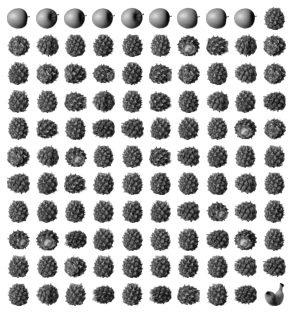

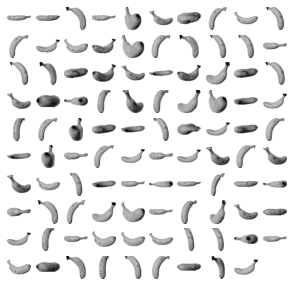

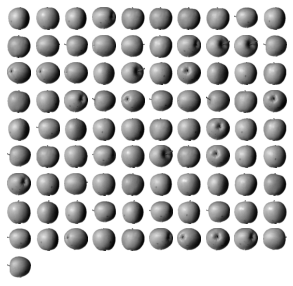

In [59]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label], ratio=0.5)     # ratio = 0.5는 이미지 크기 작게해서 보려고 넣은 것. draw_fruits 함수에 기본값 1로 설정돼있음.
    print("\n")

데이터의 차원을 줄일 때 장점:
1. 저장 공간 축소
2. 모델 학습 시간 감소
3. 시각화가 쉬워짐    

예를 들어, fruits_pca 데이터는 2개의 특성만 가지고 있기 때문에 2차원으로 표현할 수 있다.    
km.labels_ = [0, 1, 2] 를 사용해 클러스터별로 산점도를 그릴 수 있다.

[-2778.41779459 -1571.87380954] -2778.4177945852266 -1571.8738095433607




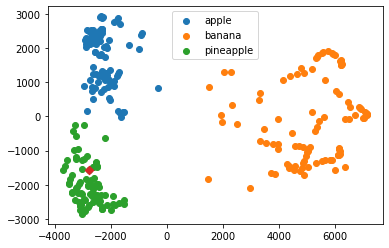

In [63]:
for label in range(0, 3):                           # 각 레이블(0, 1, 2) 순서대로 하나씩
    data = fruits_pca[km.labels_ == label]          # 산점도에 그려준다 (ex. apple 산점도를 그리고, for문 다음으로 넘어가서 banana 산점도를 그리고.)
    plt.scatter(data[:,0], data[:,1])               # 참고: 두 인자는 개별 데이터의 0번째, 1번째 인덱스를 뜻하며 / 각각 x, y 좌표의 역할을 한다.

print(data[0], data[0][0], data[0][1])                      # 예를 들면, data[0] 의 데이터는 (차원 축소해서 나온) 두 개 특성에 대한 값을 가지며,
print('\n')                                                 # array 형태로 나와있고, 각각 x, y 좌표의 역할을 해서 산점도에 그려진다.
plt.scatter(data[0][0], data[0][1], marker='D')             # data의 0번째 데이터를 빨간색 다이아몬드로 표시해보았다.                                                       

plt.legend(['apple', 'banana', 'pineapple'])                # 각 레이블(0, 1, 2)에 대해서 legend로 이름붙여주고
plt.show()                                                  # 산점도 show